In [30]:
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [81]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 


In [44]:
df = pd.read_csv('./project/FINAL.csv', encoding='utf-8')
df

,GUGUN,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
0,부산_강서구,133231.0,83.0,34.0,4.0,91.0,350.0,74.393723,900.0
1,부산_금정구,245670.0,55.0,48.0,17.0,37.0,1234.0,85.841343,900.0
2,부산_기장군,167231.0,40.0,33.0,7.0,83.0,501.0,84.019095,725.0
3,부산_남구,283267.0,69.0,46.0,19.0,72.0,4343.0,81.613035,850.0
4,부산_동구,89692.0,24.0,19.0,20.0,5.0,521.0,85.595960,500.0
5,부산_동래구,271004.0,71.0,49.0,41.0,50.0,1603.0,82.966828,1000.0
6,부산_부산진구,362296.0,75.0,68.0,117.0,40.0,2048.0,74.354362,900.0
7,부산_북구,294030.0,75.0,52.0,23.0,75.0,1021.0,87.089070,750.0
8,부산_사상구,225751.0,78.0,37.0,26.0,46.0,719.0,88.089766,700.0
9,부산_사하구,327956.0,104.0,57.0,31.0,78.0,1163.0,79.586089,500.0


In [45]:
df.set_index('GUGUN',inplace = True)

In [46]:
df.describe()

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,287371.903226,131.516129,44.032258,33.516129,51.709677,725.000000,83.221755,779.161290
std,204914.480956,158.548388,19.766105,33.240408,43.405985,1081.443048,6.285145,241.079115
min,32560.000000,0.000000,9.000000,0.000000,5.000000,0.000000,74.354362,0.000000
25%,150231.000000,35.000000,31.500000,17.000000,18.500000,22.000000,80.901414,704.500000
50%,228528.000000,75.000000,44.000000,24.000000,40.000000,246.000000,82.320442,826.000000
75%,349605.000000,167.000000,57.000000,41.000000,74.000000,1092.000000,85.554113,912.000000
max,771003.000000,746.000000,84.000000,159.000000,178.000000,4343.000000,110.191496,1273.000000


In [47]:
df_busan = df.iloc[0:15]
df_busan

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
GUGUN,,,,,,,,
부산_강서구,133231.0,83.0,34.0,4.0,91.0,350.0,74.393723,900.0
부산_금정구,245670.0,55.0,48.0,17.0,37.0,1234.0,85.841343,900.0
부산_기장군,167231.0,40.0,33.0,7.0,83.0,501.0,84.019095,725.0
부산_남구,283267.0,69.0,46.0,19.0,72.0,4343.0,81.613035,850.0
부산_동구,89692.0,24.0,19.0,20.0,5.0,521.0,85.595960,500.0
부산_동래구,271004.0,71.0,49.0,41.0,50.0,1603.0,82.966828,1000.0
부산_부산진구,362296.0,75.0,68.0,117.0,40.0,2048.0,74.354362,900.0
부산_북구,294030.0,75.0,52.0,23.0,75.0,1021.0,87.089070,750.0
부산_사상구,225751.0,78.0,37.0,26.0,46.0,719.0,88.089766,700.0


In [48]:
df_busan.describe()

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
count,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,204258.266667,53.60000,36.933333,27.000000,46.200000,1208.733333,83.881853,765.000000
std,93701.806086,27.24964,16.175231,26.901938,27.573797,1028.143852,8.432187,193.603055
min,44223.000000,22.00000,9.000000,4.000000,5.000000,246.000000,74.354362,500.000000
25%,126416.500000,25.00000,26.000000,17.000000,27.000000,544.500000,79.535907,600.000000
50%,210393.000000,55.00000,34.000000,22.000000,40.000000,1021.000000,82.966828,800.000000
75%,277135.500000,75.00000,48.500000,28.500000,73.500000,1498.000000,85.718651,900.000000
max,362296.000000,104.00000,68.000000,117.000000,91.000000,4343.000000,110.191496,1100.000000


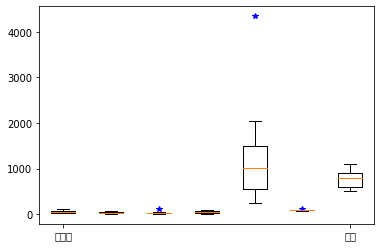

In [65]:

fig, ax = plt.subplots()


ax.boxplot([df_busan['교통'],df_busan['학교수'],df_busan['1근린'],df_busan['2근린'],df_busan['행사수'],df_busan['치안율'],df_busan['아파트평당가격']] , sym="b*")
plt.xticks([1, 7], 
           ['인구수', '교통'])
plt.show()

In [75]:
scaler = StandardScaler()
df_busan_scaler = scaler.fit(df_busan)
sc=scaler.transform(df_busan)

In [77]:
sc=pd.DataFrame(sc)

In [79]:
sc[0]

0    -0.784619
1     0.457464
2    -0.409030
3     0.872788
4    -1.265582
5     0.737322
6     1.745800
7     0.991684
8     0.237424
9     1.366455
10   -1.029713
11   -0.284721
12    0.067769
13   -0.935175
14   -1.767866
Name: 0, dtype: float64

In [87]:
stds = StandardScaler()
print(stds.fit(df_busan)) 
total_stds = stds.transform(df_busan)
t = pd.DataFrame(total_stds)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [89]:
t

,0,1,2,3,4,5,6,7
0,-0.784619,1.116781,-0.187712,-0.884965,1.681756,-0.864542,-1.164721,0.721777
1,0.457464,0.053180,0.708187,-0.384767,-0.345361,0.025438,0.240538,0.721777
2,-0.409030,-0.516606,-0.251705,-0.769534,1.381443,-0.712521,0.016847,-0.213860
3,0.872788,0.584981,0.580201,-0.307814,0.968511,3.155467,-0.278510,0.454452
4,-1.265582,-1.124379,-1.147604,-0.269337,-1.546615,-0.692385,0.210416,-1.416822
5,0.737322,0.660952,0.772180,0.538674,0.142649,0.396934,-0.112324,1.256427
6,1.745800,0.812895,1.988043,3.462905,-0.232743,0.844944,-1.169553,0.721777
7,0.991684,0.812895,0.964158,-0.153907,1.081129,-0.189003,0.393704,-0.080197
8,0.237424,0.926853,0.004266,-0.038477,-0.007508,-0.493046,0.516545,-0.347522
9,1.366455,1.914482,1.284122,0.153907,1.193747,-0.046043,-0.527329,-1.416822


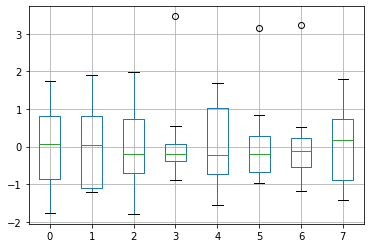

In [88]:
t.boxplot()

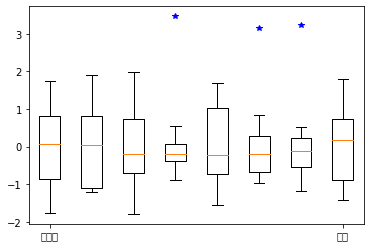

In [80]:

fig, ax = plt.subplots()


ax.boxplot([sc[0],sc[1],sc[2],sc[3],sc[4],sc[5],sc[6],sc[7]] , sym="b*")
plt.xticks([1, 8], 
           ['인구수', '교통'])
plt.show()

In [49]:
df_ulsan = df.iloc[16:21]
df_ulsan

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
GUGUN,,,,,,,,
울산_남구,336914.0,135.0,61.0,159.0,145.0,189.0,84.731887,924.0
울산_동구,169673.0,208.0,34.0,33.0,78.0,23.0,81.612843,726.0
울산_북구,207284.0,183.0,44.0,24.0,59.0,130.0,78.224456,710.0
울산_울주군,228528.0,203.0,57.0,21.0,14.0,21.0,81.602084,709.0
울산_중구,237012.0,64.0,41.0,49.0,142.0,30.0,82.320442,883.0


In [50]:
df_ulsan.describe()

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
count,5.000000,5.000000,5.00000,5.00000,5.000000,5.00000,5.000000,5.000000
mean,235882.200000,158.600000,47.40000,57.20000,87.600000,78.60000,81.698342,790.400000
std,62177.770394,60.235372,11.28273,57.94135,56.082974,76.81341,2.327760,104.476313
min,169673.000000,64.000000,34.00000,21.00000,14.000000,21.00000,78.224456,709.000000
25%,207284.000000,135.000000,41.00000,24.00000,59.000000,23.00000,81.602084,710.000000
50%,228528.000000,183.000000,44.00000,33.00000,78.000000,30.00000,81.612843,726.000000
75%,237012.000000,203.000000,57.00000,49.00000,142.000000,130.00000,82.320442,883.000000
max,336914.000000,208.000000,61.00000,159.00000,145.000000,189.00000,84.731887,924.000000


In [90]:
stds = StandardScaler()
print(stds.fit(df_ulsan)) 
total_stds = stds.transform(df_ulsan)
t = pd.DataFrame(total_stds)

StandardScaler(copy=True, with_mean=True, with_std=True)


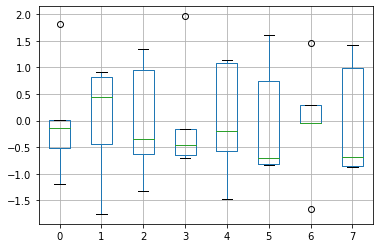

In [91]:
t.boxplot()

In [53]:
df_incheon = df.iloc[21:30]
df_incheon

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
GUGUN,,,,,,,,
인천_강화군,102795.0,37.0,38.0,4.0,5.0,4.0,86.144578,385.0
인천_계양구,434104.0,151.0,52.0,24.0,26.0,7.0,89.545341,812.0
인천_남동구,768394.0,206.0,76.0,79.0,53.0,29.0,81.554029,925.0
인천_동구,94559.0,15.0,14.0,9.0,5.0,4.0,81.554029,696.0
인천_미추홀구,607867.0,122.0,50.0,42.0,58.0,0.0,80.248800,826.0
인천_부평구,744602.0,369.0,82.0,58.0,36.0,19.0,81.597092,974.0
인천_서구,771003.0,746.0,84.0,41.0,178.0,5.0,82.800745,983.0
인천_연수구,501760.0,467.0,61.0,34.0,13.0,31.0,88.120343,1273.0
인천_옹진군,32560.0,0.0,16.0,0.0,5.0,1.0,83.294787,0.0


In [54]:
df_incheon.describe()

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,450849.333333,234.777778,52.555556,32.333333,42.111111,11.111111,83.873305,763.777778
std,304179.439549,249.097259,26.263621,26.148614,54.900921,12.035826,3.277372,373.358332
min,32560.000000,0.000000,14.000000,0.000000,5.000000,0.000000,80.248800,0.000000
25%,102795.000000,37.000000,38.000000,9.000000,5.000000,4.000000,81.554029,696.000000
50%,501760.000000,151.000000,52.000000,34.000000,26.000000,5.000000,82.800745,826.000000
75%,744602.000000,369.000000,76.000000,42.000000,53.000000,19.000000,86.144578,974.000000
max,771003.000000,746.000000,84.000000,79.000000,178.000000,31.000000,89.545341,1273.000000


In [7]:
reg= linear_model.LinearRegression() # LinearRegression 모델 생성, 그 안에 X,y 데이터 fit
reg.fit(X,y)

In [8]:
# coef : 기울기, intercept : 절편

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.048744700446154865
coefficient= [0.23079759]
intercept= 23.333783949858663


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X1= df['height']
Y1= df['weight']

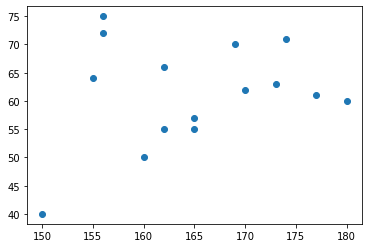

In [19]:
plt.plot(X1,Y1,'o') # 선형회귀 분석
plt.show()

In [21]:
line_fit = linear_model.LinearRegression()
line_fit.fit(X1.values.reshape(-1,1),Y1) # 2차원 형태

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

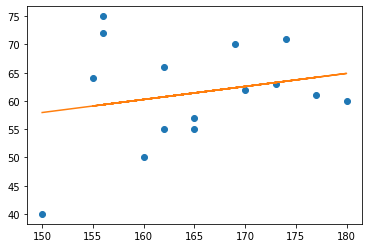

In [23]:
plt.plot(X1, Y1, 'o')
plt.plot(X1,line_fit.predict(X1.values.reshape(-1,1)))
plt.show()

NameError: name 'summary' is not defined

In [92]:
stds = StandardScaler()
print(stds.fit(df_incheon)) 
total_stds = stds.transform(df_incheon)
t = pd.DataFrame(total_stds)

StandardScaler(copy=True, with_mean=True, with_std=True)


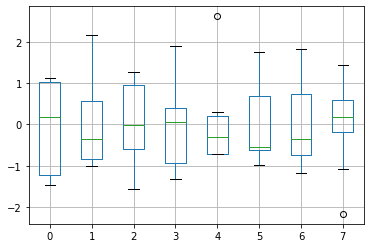

In [93]:
t.boxplot()

전체 데이터

In [94]:
stds = StandardScaler()
print(stds.fit(df)) 
total_stds = stds.transform(df)
t = pd.DataFrame(total_stds)

StandardScaler(copy=True, with_mean=True, with_std=True)


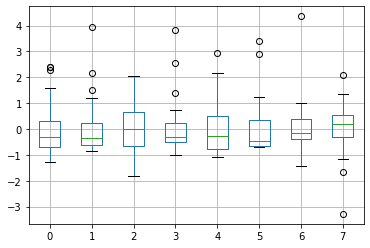

In [95]:
t.boxplot()

In [96]:
df.columns

Index(['인구수', '교통', '학교수', '1근린', '2근린', '행사수', '치안율', '아파트평당가격'], dtype='object')

In [98]:
t

,0,1,2,3,4,5,6,7
0,-0.764655,-0.311060,-0.515938,-0.902637,0.920145,-0.352491,-1.427805,0.509526
1,-0.206873,-0.490582,0.204053,-0.505082,-0.344488,0.478448,0.423680,0.509526
2,-0.595989,-0.586754,-0.567366,-0.810894,0.732792,-0.210555,0.128958,-0.228376
3,-0.020363,-0.400821,0.101197,-0.443920,0.475182,3.400832,-0.260187,0.298697
4,-0.980641,-0.689338,-1.287357,-0.413339,-1.093900,-0.191755,0.383993,-1.177107
5,-0.081197,-0.387998,0.255481,0.228865,-0.040039,0.825299,-0.041231,0.931185
6,0.371680,-0.362352,1.232612,2.553033,-0.274230,1.243588,-1.434171,0.509526
7,0.033029,-0.362352,0.409765,-0.321595,0.545439,0.278233,0.625482,-0.122961
8,-0.305686,-0.343118,-0.361655,-0.229852,-0.133716,-0.005640,0.787329,-0.333790
9,0.201328,-0.176419,0.666904,-0.076946,0.615696,0.411709,-0.588016,-1.177107


In [100]:
df.iloc[27]

인구수        771003.000000
교통            746.000000
학교수            84.000000
1근린            41.000000
2근린           178.000000
행사수             5.000000
치안율            82.800745
아파트평당가격       983.000000
Name: 인천_서구, dtype: float64

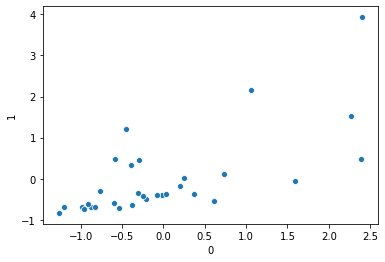

In [102]:
import seaborn as sns
sns.scatterplot(x=0,y=1,data=t) 
plt.show()

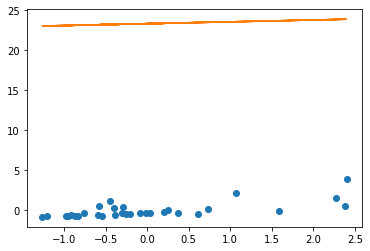

In [112]:
k=np.corrcoef(t.transpose())
df.columns

Index(['인구수', '교통', '학교수', '1근린', '2근린', '행사수', '치안율', '아파트평당가격'], dtype='object')

In [113]:
pd.DataFrame(k)

,0,1,2,3,4,5,6,7
0,1.000000,0.686723,0.876670,0.470820,0.380185,-0.033039,-0.085967,0.550982
1,0.686723,1.000000,0.634489,0.170396,0.372146,-0.310832,-0.093365,0.434181
2,0.876670,0.634489,1.000000,0.559661,0.467317,0.096306,-0.084390,0.517431
3,0.470820,0.170396,0.559661,1.000000,0.426121,0.069973,-0.185764,0.403546
4,0.380185,0.372146,0.467317,0.426121,1.000000,0.045610,-0.101009,0.309263
5,-0.033039,-0.310832,0.096306,0.069973,0.045610,1.000000,-0.084812,0.239445
6,-0.085967,-0.093365,-0.084390,-0.185764,-0.101009,-0.084812,1.000000,-0.192141
7,0.550982,0.434181,0.517431,0.403546,0.309263,0.239445,-0.192141,1.000000


아파트 평당 가격 올라가면 치안율 낮아진다
아예 발생도 안하고 검거도 안할 수도 있고... 발생은 하지만 검거는 다른곳에서 이루어 질수도 있고
학교수는 대부분 증가하면 증가하는걸로 보임 그런데 행사수 , 치안율 : 상관없음
상관이 없는 것들 : (인구수, 행사수)(인구수, 치안율), (교통, 치안율), (학교수, 행사수), (학교수, 치안율), (1근린, 행사수)(2근린,행사수)(2근린, 치안율), (행사수, 치안율), 
상관이 있는 것 : (인구수, 교통)(인구수, 학교수)(교통, 학교수)

단순 선형
1. 표준화 안한 변수로


In [183]:
# 1. 인구수, 아파트평당가격
X =df.loc[:,['인구수']]
y =df['아파트평당가격']

In [184]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.303580975989797
coefficient= [0.00064822]
intercept= 592.8803080973626


In [187]:
line_fit = linear_model.LinearRegression()
line_fit.fit(X.values.reshape(-1,1),y)

#model1 = linear_model.LinearRegression()
#model1.fit(df["인구수"], df["교통"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

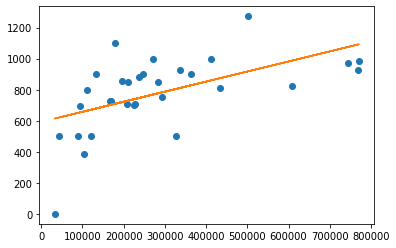

In [188]:
plt.plot(X, y, 'o')
plt.plot(X,line_fit.predict(X.values.reshape(-1,1)))
plt.show()

In [189]:
# 2. 교통, 아파트평당가격
X =df.loc[:,['교통']]
y =df['아파트평당가격']

In [190]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.18851332942137586
coefficient= [0.66018977]
intercept= 692.3356875450211


In [193]:
line_fit = linear_model.LinearRegression()
line_fit.fit(X.values.reshape(-1,1),y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

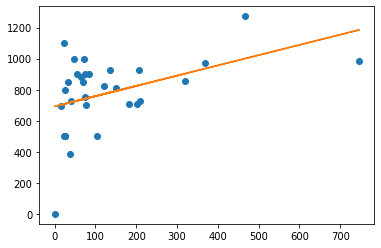

In [194]:
plt.plot(X, y, 'o')
plt.plot(X,line_fit.predict(X.values.reshape(-1,1)))
plt.show()

In [195]:
# 3. 학교수, 아파트평당가격
X =df.loc[:,['학교수']]
y =df['아파트평당가격']

In [196]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.2677351798379902
coefficient= [6.31089858]
intercept= 501.27817531305897


In [199]:
line_fit = linear_model.LinearRegression()
line_fit.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

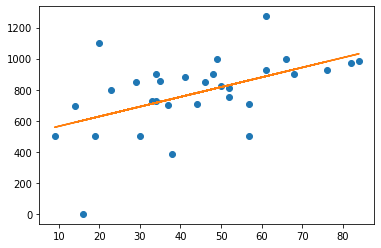

In [200]:
plt.plot(X, y, 'o')
plt.plot(X,line_fit.predict(X.values.reshape(-1,1)))
plt.show()

In [206]:
# 4. 1근린, 아파트평당가격
X =df.loc[:,['1근린']]
y =df['아파트평당가격']

In [207]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.16284976981565957
coefficient= [2.92675801]
intercept= 681.0676910800132


In [209]:
line_fit = linear_model.LinearRegression()
line_fit.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

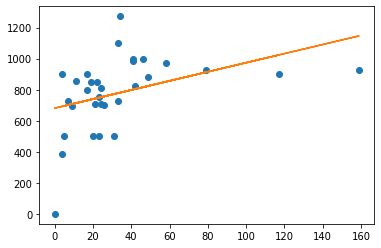

In [210]:
plt.plot(X, y, 'o')
plt.plot(X,line_fit.predict(X.values.reshape(-1,1)))
plt.show()

In [212]:
# 5. 2근린, 아파트평당가격
X =df.loc[:,['2근린']]
y =df['아파트평당가격']

In [213]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.0956436913890768
coefficient= [1.71766368]
intercept= 690.3414553411322


In [216]:
line_fit = linear_model.LinearRegression()
line_fit.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

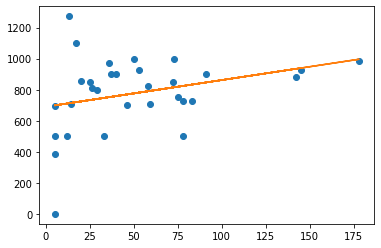

In [217]:
plt.plot(X, y, 'o')
plt.plot(X,line_fit.predict(X.values.reshape(-1,1)))
plt.show()

In [218]:
# 6. 행사수, 아파트평당가격
X =df.loc[:,['행사수']]
y =df['아파트평당가격']

In [219]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.057333716861056594
coefficient= [0.05337784]
intercept= 740.4623573252791


In [222]:
line_fit = linear_model.LinearRegression()
line_fit.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

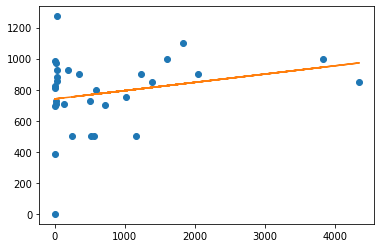

In [223]:
plt.plot(X, y, 'o')
plt.plot(X,line_fit.predict(X.values.reshape(-1,1)))
plt.show()

In [254]:
# 7. 치안율, 아파트평당가격
X =df.loc[:,['치안율']]
print(type(X))
y =df['아파트평당가격']

<class 'pandas.core.frame.DataFrame'>


In [231]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.036918001155019975
coefficient= [-7.36993067]
intercept= 1392.4998550675164


In [233]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

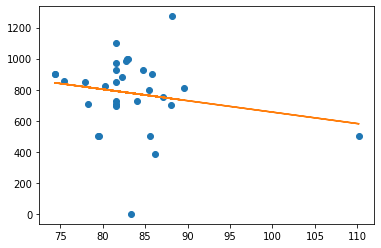

In [234]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [265]:
# 1. 인구수, 아파트평당가격
X =df_busan.loc[:,['인구수']]
y =df_busan['아파트평당가격']

In [266]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [267]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.12425027528077204
coefficient= [0.0007283]
intercept= 616.2378090936205


In [268]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

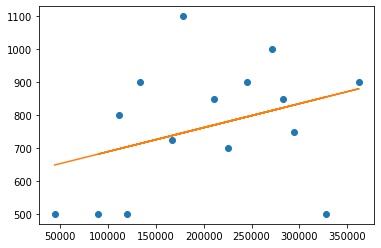

In [269]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [270]:
# 2. 교통, 아파트평당가격
X =df_busan.loc[:,['교통']]
y =df_busan['아파트평당가격']

In [271]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [272]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.010011216861254724
coefficient= [0.71087768]
intercept= 726.8969564046328


In [273]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

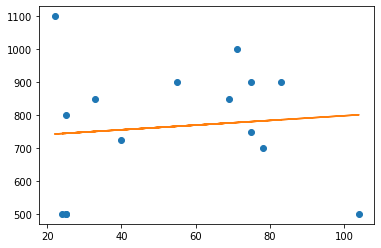

In [274]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [280]:
# 3. 학교수, 아파트평당가격
X =df_busan.loc[:,['학교수']]
y =df_busan['아파트평당가격']

In [281]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.059175271324809375
coefficient= [2.9116009]
intercept= 657.4648733255679


In [283]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

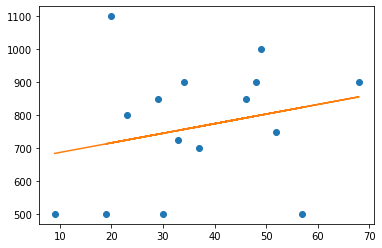

In [284]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [285]:
# 4. 1근린, 아파트평당가격
X =df_busan.loc[:,['1근린']]
y =df_busan['아파트평당가격']

In [286]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [287]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.07636642719156228
coefficient= [1.98874852]
intercept= 711.3037899723648


In [288]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

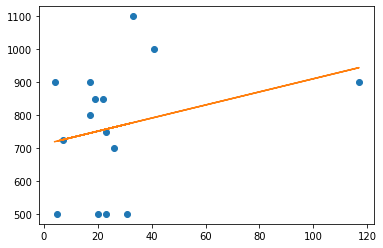

In [289]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [290]:
# 5. 2근린, 아파트평당가격
X =df_busan.loc[:,['2근린']]
y =df_busan['아파트평당가격']

In [291]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.011544030273725414
coefficient= [0.75438728]
intercept= 730.1473075044155


In [293]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

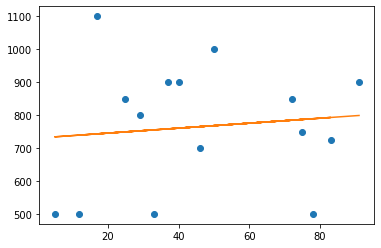

In [294]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [295]:
# 6. 행사수, 아파트평당가격
X =df_busan.loc[:,['행사수']]
y =df_busan['아파트평당가격']

In [296]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [297]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.19887778934966904
coefficient= [0.08397528]
intercept= 663.4962789266245


In [298]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

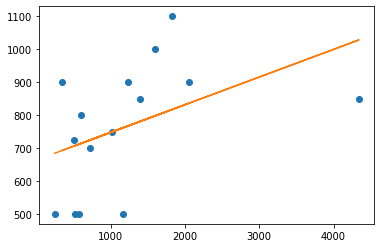

In [299]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [300]:
# 7. 치안율, 아파트평당가격
X =df_busan.loc[:,['치안율']]
y =df_busan['아파트평당가격']

In [301]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.16822440360807067
coefficient= [-9.41708503]
intercept= 1554.9225389811463


In [303]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

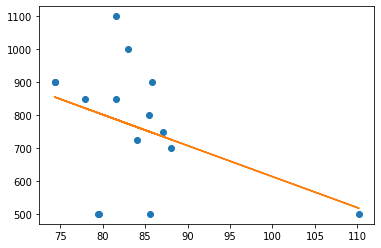

In [304]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [305]:
# 1. 인구수, 아파트평당가격
X =df_ulsan.loc[:,['인구수']]
y =df_ulsan['아파트평당가격']

In [306]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.63856819751497
coefficient= [0.00134272]
intercept= 473.6756117858706


In [308]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

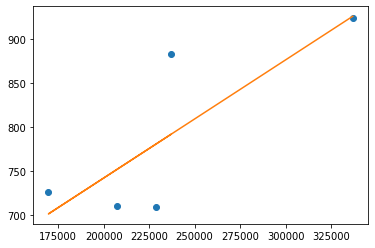

In [309]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [310]:
# 2. 교통, 아파트평당가격
X =df_ulsan.loc[:,['교통']]
y =df_ulsan['아파트평당가격']

In [311]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [312]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.674264833646723
coefficient= [-1.42423449]
intercept= 1016.2835901110714


In [313]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

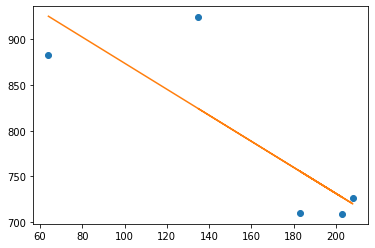

In [314]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [315]:
# 3. 학교수, 아파트평당가격
X =df_ulsan.loc[:,['학교수']]
y =df_ulsan['아파트평당가격']

In [316]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [317]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.11217348373592839
coefficient= [3.10133543]
intercept= 643.3967007069914


In [318]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

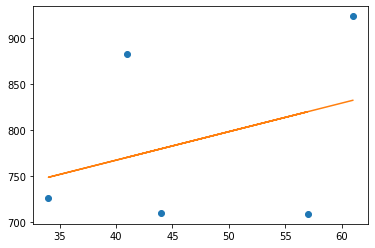

In [319]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [320]:
# 4. 1근린, 아파트평당가격
X =df_ulsan.loc[:,['1근린']]
y =df_ulsan['아파트평당가격']

In [321]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [322]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.6832888800777781
coefficient= [1.49049803]
intercept= 705.1435124508519


In [323]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

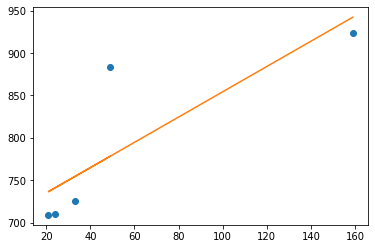

In [324]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [325]:
# 5. 2근린, 아파트평당가격
X =df_ulsan.loc[:,['2근린']]
y =df_ulsan['아파트평당가격']

In [326]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [327]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.8505203489202641
coefficient= [1.71802372]
intercept= 639.9011223094776


In [328]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

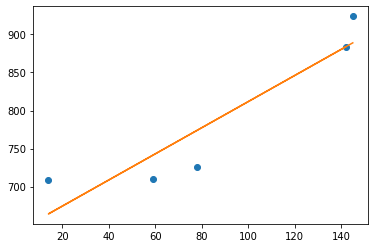

In [329]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [330]:
# 6. 행사수, 아파트평당가격
X =df_ulsan.loc[:,['행사수']]
y =df_ulsan['아파트평당가격']

In [331]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [332]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.20083448333227882
coefficient= [0.6095368]
intercept= 742.490407267427


In [333]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

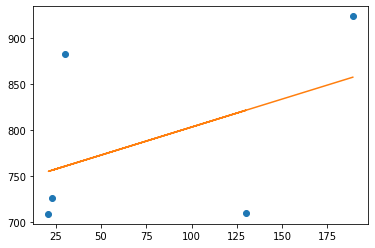

In [334]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [335]:
# 7. 치안율, 아파트평당가격
X =df_ulsan.loc[:,['치안율']]
y =df_ulsan['아파트평당가격']

In [336]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [337]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.6032140648739612
coefficient= [34.85903579]
intercept= -2057.525439318663


In [338]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

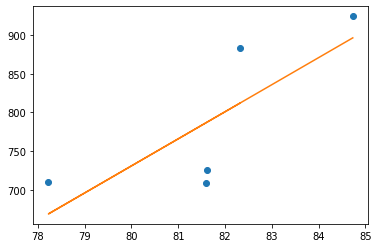

In [339]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [340]:
# 1. 인구수, 아파트평당가격
X =df_incheon.loc[:,['인구수']]
y =df_incheon['아파트평당가격']

In [341]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [342]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.5826158693396877
coefficient= [0.00093689]
intercept= 341.38296171729286


In [343]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

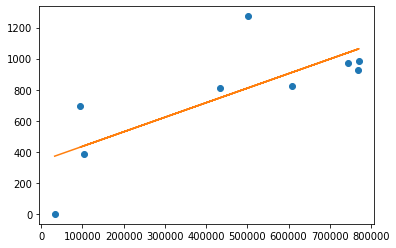

In [344]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [345]:
# 2. 교통, 아파트평당가격
X =df_incheon.loc[:,['교통']]
y =df_incheon['아파트평당가격']

In [346]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [347]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.4735023053618037
coefficient= [1.0313782]
intercept= 521.6330954704581


In [348]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

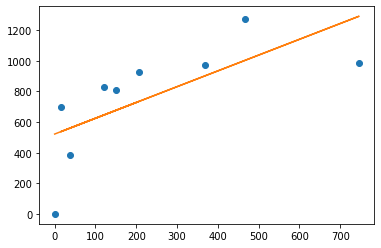

In [349]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [350]:
# 3. 학교수, 아파트평당가격
X =df_incheon.loc[:,['학교수']]
y =df_incheon['아파트평당가격']

In [351]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [352]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.5284162677067081
coefficient= [10.33378302]
intercept= 220.68007007087647


In [353]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

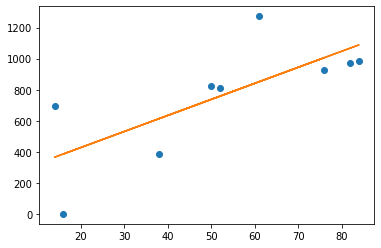

In [354]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [355]:
# 4. 1근린, 아파트평당가격
X =df_incheon.loc[:,['1근린']]
y =df_incheon['아파트평당가격']

In [356]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [357]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.45835199845683927
coefficient= [9.66666667]
intercept= 451.2222222222223


In [358]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

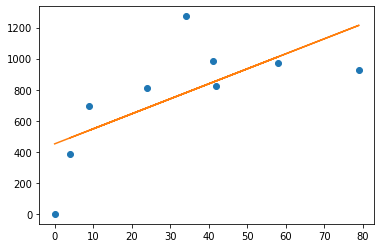

In [359]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [360]:
# 5. 2근린, 아파트평당가격
X =df_incheon.loc[:,['2근린']]
y =df_incheon['아파트평당가격']

In [361]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [362]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.13641298167658855
coefficient= [2.51173646]
intercept= 658.0057645519225


In [363]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

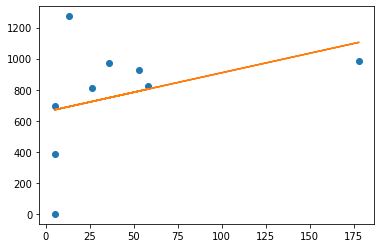

In [364]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [365]:
# 6. 행사수, 아파트평당가격
X =df_incheon.loc[:,['행사수']]
y =df_incheon['아파트평당가격']

In [366]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [367]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.4214919415458427
coefficient= [20.13930968]
intercept= 540.0076701821669


In [368]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

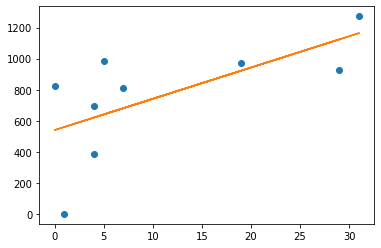

In [369]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

In [370]:
# 7. 치안율, 아파트평당가격
X =df_incheon.loc[:,['치안율']]
y =df_incheon['아파트평당가격']

In [371]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [372]:
print( "R²=", reg.score(X,y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.007751717134681036
coefficient= [10.02995665]
intercept= -77.46783489862673


In [373]:
reg.fit(X.values.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

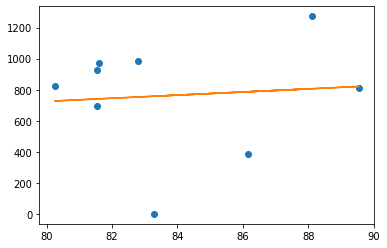

In [374]:
plt.plot(X, y, 'o')
plt.plot(X,reg.predict(X.values.reshape(-1,1)))
plt.show()

다중 회귀
1. 표준화 안한 변수로
2. 몇개만 표준활를 한다면

In [396]:
t.rename(columns = {0:"인구수",1:"교통",2:"학교수",3:"1근린",4:"2근린",5:"행사수",6:"치안율",7:"아파트평당가격"},inplace=True)
t

,인구수,교통,학교수,1근린,2근린,행사수,치안율,아파트평당가격
0,-0.764655,-0.311060,-0.515938,-0.902637,0.920145,-0.352491,-1.427805,0.509526
1,-0.206873,-0.490582,0.204053,-0.505082,-0.344488,0.478448,0.423680,0.509526
2,-0.595989,-0.586754,-0.567366,-0.810894,0.732792,-0.210555,0.128958,-0.228376
3,-0.020363,-0.400821,0.101197,-0.443920,0.475182,3.400832,-0.260187,0.298697
4,-0.980641,-0.689338,-1.287357,-0.413339,-1.093900,-0.191755,0.383993,-1.177107
5,-0.081197,-0.387998,0.255481,0.228865,-0.040039,0.825299,-0.041231,0.931185
6,0.371680,-0.362352,1.232612,2.553033,-0.274230,1.243588,-1.434171,0.509526
7,0.033029,-0.362352,0.409765,-0.321595,0.545439,0.278233,0.625482,-0.122961
8,-0.305686,-0.343118,-0.361655,-0.229852,-0.133716,-0.005640,0.787329,-0.333790
9,0.201328,-0.176419,0.666904,-0.076946,0.615696,0.411709,-0.588016,-1.177107


In [409]:
# 인구수', '교통', '학교수', '1근린', '2근린', '행사수', '치안율'
X = t[['인구수','교통','학교수','1근린','2근린','행사수','치안율']]
y = t['아파트평당가격']

In [410]:
reg= linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [411]:
print( "R²=", reg.score(X, y) )
print( "coefficient=", reg.coef_ )
print( "intercept=", reg.intercept_ )

R²= 0.46195145682464556
coefficient= [ 0.4066739   0.40363844 -0.28598856  0.26436821  0.00175206  0.38205516
 -0.06193893]
intercept= 2.2930296654244154e-16


In [415]:
t.columns

Index(['인구수', '교통', '학교수', '1근린', '2근린', '행사수', '치안율', '아파트평당가격'], dtype='object')

In [424]:
colmns_x =['인구수', '교통', '학교수', '1근린', '2근린', '행사수', '치안율']
colmns_y =['아파트평당가격']

In [425]:
pdx = t[colmns_x]
pdy = t[colmns_y]

In [472]:
import statsmodels.api as sm
x = sm.add_constant(pdx)
#y = sm.add_constant(pdy)
full_mod = sm.OLS(pdy,x)
full_mod

In [473]:
full_res=full_mod.fit()
full_res

In [474]:
print("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                아파트평당가격   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     3.754
Date:                Wed, 19 Feb 2020   Prob (F-statistic):             0.0113
Time:                        19:26:32   Log-Likelihood:                -35.307
No. Observations:                  31   AIC:                             82.61
Df Residuals:                      25   BIC:                             91.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.151   1.19e-15     

In [434]:
cnames = x.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x[yvar], sm.add_constant(x[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))

const 0.0
인구수 5.065
교통 2.858
학교수 5.993
1근린 1.848
2근린 1.437
행사수 1.398
치안율 1.072


In [454]:
colmns_x =['인구수', '교통', '1근린','2근린', '행사수', '치안율']
colmns_y =['아파트평당가격']

In [455]:
pdx = t[colmns_x]
pdy = t[colmns_y]

In [475]:
x = sm.add_constant(pdx)
y = sm.add_constant(pdy)
full_mod = sm.OLS(pdy,x)
full_mod

In [476]:
full_res=full_mod.fit()
full_res

In [477]:
print("\n \n",full_res.summary())


 
                             OLS Regression Results                            
Dep. Variable:                아파트평당가격   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     3.754
Date:                Wed, 19 Feb 2020   Prob (F-statistic):             0.0113
Time:                        19:26:54   Log-Likelihood:                -35.307
No. Observations:                  31   AIC:                             82.61
Df Residuals:                      25   BIC:                             91.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.151   1.19e-15     

In [459]:
cnames = x.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x[yvar], sm.add_constant(x[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))

const 0.0
인구수 2.668
교통 2.624
1근린 1.616
2근린 1.41
행사수 1.233
치안율 1.059


In [460]:
colmns_x =['인구수', '교통', '1근린', '행사수', '치안율']
colmns_y =['아파트평당가격']

In [461]:
pdx = t[colmns_x]
pdy = t[colmns_y]

In [462]:
x = sm.add_constant(pdx)
y = sm.add_constant(pdy)
full_mod = sm.OLS(pdy,pdx)
full_mod

In [463]:
full_res=full_mod.fit()
full_res

In [464]:
print("\n \n",full_res.summary())


 
                                  OLS Regression Results                                
Dep. Variable:                아파트평당가격   R-squared (uncentered):                   0.448
Model:                            OLS   Adj. R-squared (uncentered):              0.342
Method:                 Least Squares   F-statistic:                              4.222
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                     0.00608
Time:                        19:23:30   Log-Likelihood:                         -34.774
No. Observations:                  31   AIC:                                      79.55
Df Residuals:                      26   BIC:                                      86.72
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [465]:
cnames = x.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x[yvar], sm.add_constant(x[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))

const 0.0
인구수 2.662
교통 2.399
1근린 1.409
행사수 1.205
치안율 1.059


In [466]:
colmns_x =['학교수', '교통', '1근린', '행사수', '치안율']
colmns_y =['아파트평당가격']

In [467]:
pdx = t[colmns_x]
pdy = t[colmns_y]

In [468]:
x = sm.add_constant(pdx)
y = sm.add_constant(pdy)
full_mod = sm.OLS(pdy,pdx)
full_mod

In [469]:
full_res=full_mod.fit()
full_res

In [470]:
print("\n \n",full_res.summary())


 
                                  OLS Regression Results                                
Dep. Variable:                아파트평당가격   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              3.904
Date:                Wed, 19 Feb 2020   Prob (F-statistic):                     0.00899
Time:                        19:25:28   Log-Likelihood:                         -35.307
No. Observations:                  31   AIC:                                      80.61
Df Residuals:                      26   BIC:                                      87.78
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [471]:
cnames = x.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x[yvar], sm.add_constant(x[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))

const 0.0
학교수 3.144
교통 2.5
1근린 1.697
행사수 1.375
치안율 1.072
